# AB Testing

In [3]:
import numpy as np
from scipy.stats import chi2_contingency as chisquare

In [4]:
data = np.array([[2, 38], [4, 46]])
data

array([[ 2, 38],
       [ 4, 46]])

In [5]:
data = np.array([[2, 38], [4, 46]])
chi2, p, dof, expected = chisquare(data)
print(f"Chi-square value: {chi2:.3f}")
print(f"p-value: {p:.3f}")
print(f"Degrees of freedom: {dof}")

Chi-square value: 0.020
p-value: 0.887
Degrees of freedom: 1


In [6]:
data = np.array([[64, 1216], [128, 1472]])
chi2, p, dof, expected = chisquare(data)
print(f"Chi-square value: {chi2:.3f}")
print(f"p-value: {p:.3f}")
print(f"Degrees of freedom: {dof}")

Chi-square value: 9.809
p-value: 0.002
Degrees of freedom: 1


# Bayesian Approach # 1

In [7]:
import numpy as np
import matplotlib.pyplot as plt

thetas = np.linspace(0, 1, 1001)
print(thetas)
print(len(thetas))

[0.    0.001 0.002 ... 0.998 0.999 1.   ]
1001


In [8]:
p = np.array([1 / len(thetas) for _ in thetas])  # Uniform distribution
print(p)
print(f"Sum: {np.sum(p):.3f}")

[0.000999 0.000999 0.000999 ... 0.000999 0.000999 0.000999]
Sum: 1.000


In [9]:
def likelihood(X):
    if X == 1:
        return thetas
    else:
        return 1 - thetas

def posterior(X, prior):
    lp = likelihood(X) * prior
    return lp / np.sum(lp)

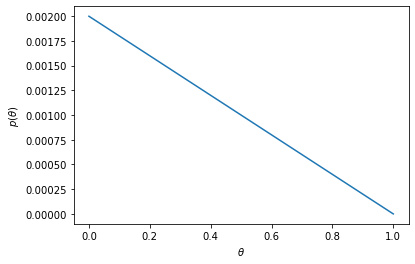

In [10]:
p = posterior(0, p)

plt.plot(thetas, p)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.show()

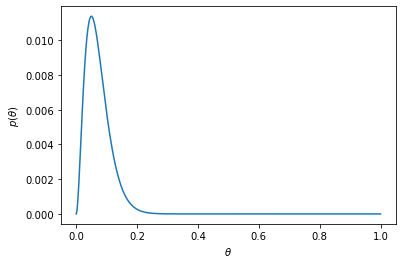

In [11]:
purchase = 2
nopurchase = 38

p = np.array([1 / len(thetas) for theta in thetas])
for _ in range(purchase):
    p = posterior(1, p)
for _ in range(nopurchase):
    p = posterior(0, p)
plt.plot(thetas, p)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.show()

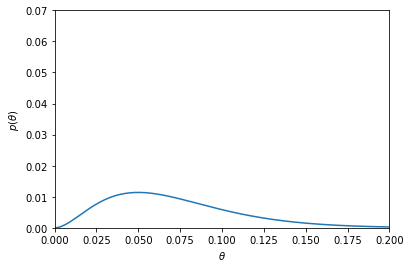

In [13]:
p_a = np.array([1 / len(thetas) for _ in thetas])
purchase_a = 2
nopurchase_a = 38
for _ in range(purchase_a):
    p_a = posterior(1, p_a)
for _ in range(nopurchase_a):
    p_a = posterior(0, p_a)
plt.plot(thetas, p_a)

p_b = np.array([1 / len(thetas) for _ in thetas])
purchase_b = 4
nopurchase_b = 46
for _ in range(purchase_b):
    p_b = posterior(1, p_b)
for _ in range(nopurchase_b):
    p_b = posterior(0, p_b)

# plt.plot(thetas, p_b)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim([0, 0.2])
plt.ylim([0, 0.07])
plt.show()

## Test 2

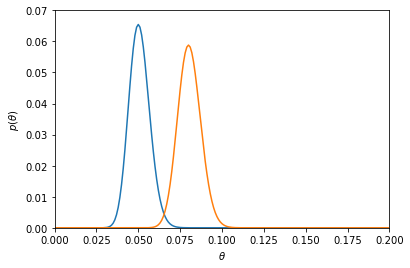

In [25]:
p_a = np.array([1 / len(thetas) for _ in thetas])
purchase_a = 64
nopurchase_a = 1216
for _ in range(purchase_a):
    p_a = posterior(1, p_a)
for _ in range(nopurchase_a):
    p_a = posterior(0, p_a)
plt.plot(thetas, p_a)

p_b = np.array([1 / len(thetas) for _ in thetas])
purchase_b = 128
nopurchase_b = 1472
for _ in range(purchase_b):
    p_b = posterior(1, p_b)
for _ in range(nopurchase_b):
    p_b = posterior(0, p_b)

plt.plot(thetas, p_b)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim([0, 0.2])
plt.ylim([0, 0.07])
plt.show()

# Bayesian Approach 2

In [132]:
thetas = np.linspace(0, 1, 1001)
def betaf(alpha, beta):
    numerator = thetas ** (alpha - 1) * (1 - thetas) ** (beta - 1)
    return numerator / numerator.sum()

def posterior(a, N):
    return betaf(a + 1, N - a + 1)

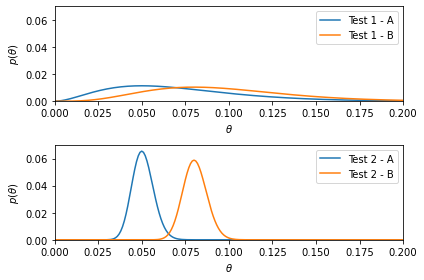

In [133]:
plt.subplot(2, 1, 1)
plt.plot(thetas, posterior(2, 40), label="Test 1 - A")
plt.plot(thetas, posterior(4, 50), label="Test 1 - B")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim([0, 0.2])
plt.ylim([0, 0.07])
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(thetas, posterior(64, 1280), label="Test 2 - A")
plt.plot(thetas, posterior(128, 1600), label="Test 2 - B")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim([0, 0.2])
plt.ylim([0, 0.07])
plt.legend()

plt.tight_layout()
plt.show()

# Bayesian Approach for Hypothesis Testing

In [134]:
def hmv(xs, ps, alpha=0.95):
    xps = sorted(zip(xs, ps), key=lambda xp: xp[1], reverse=True)
    xps = np.array(xps)
    xs = xps[:, 0]
    ps = xps[:, 1]
    return np.sort(xs[np.cumsum(ps) <= alpha])

In [135]:
thetas = np.linspace(0, 1, 1001)

def posterior(a, N):
    alpha = a + 1
    beta = N - a + 1
    numerator = thetas ** (alpha - 1) * (1 - thetas) ** (beta - 1)
    return numerator / numerator.sum()

In [136]:
ps = posterior(2, 40)

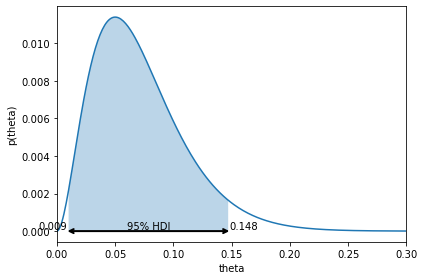

In [137]:
hm_thetas = hmv(thetas, ps, alpha=0.95)
plt.plot(thetas, ps)
plt.annotate(
    '',
    xy=(hm_thetas.min(), 0),
    xytext=(hm_thetas.max(), 0),
arrowprops=dict(color='black', shrinkA=0, shrinkB=0, arrowstyle='<->', linewidth=2))
plt.annotate('%.3f' % hm_thetas.min(),
             xy=(hm_thetas.min(), 0),
             ha='right',
             va='bottom')
plt.annotate('%.3f' % hm_thetas.max(),
             xy=(hm_thetas.max(), 0),
             ha='left',
             va='bottom')
plt.annotate('95% HDI', xy=(hm_thetas.mean(), 0),
             ha='center', va='bottom')
hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
plt.xlabel('theta')
plt.ylabel('p(theta)')
plt.xlim(0, 0.3)
plt.tight_layout()
plt.show()

In [138]:
def plot_hdi(ps, label):
    hm_thetas = hmv(thetas, ps, 0.95)
    plt.plot(thetas, ps)
    plt.annotate('', xy=(hm_thetas.min(), 0),
                 xytext=(hm_thetas.max(), 0),
                 arrowprops=dict(color='black', shrinkA=0, shrinkB=0,
                                 arrowstyle='<->', linewidth=2))
    plt.annotate('%.3f' % hm_thetas.min(), xy=(hm_thetas.min(), 0),
                 ha='right', va='bottom')
    plt.annotate('%.3f' % hm_thetas.max(), xy=(hm_thetas.max(), 0),
                 ha='left', va='bottom')
    hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
    plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
    plt.xlim(0, 0.3)
    plt.ylabel(label)
    plt.yticks([])

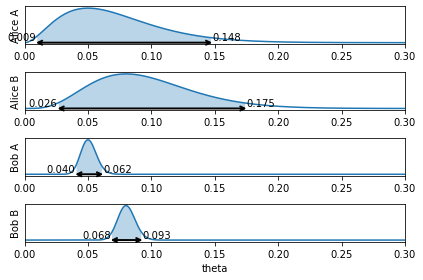

In [139]:
plt.subplot(4, 1, 1)
alice_a = posterior(2, 40)
plot_hdi(alice_a, 'Alice A')
plt.subplot(4, 1, 2)
alice_b = posterior(4, 50)
plot_hdi(alice_b, 'Alice B')
plt.subplot(4, 1, 3)
bob_a = posterior(64, 1280)
plot_hdi(bob_a, 'Bob A')
plt.subplot(4, 1, 4)
bob_b = posterior(128, 1600)
plot_hdi(bob_b, 'Bob B')
plt.xlabel(r'theta')
plt.tight_layout()
plt.show()

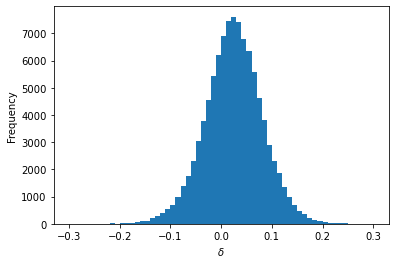

In [140]:
theta_a = np.random.beta(3, 39, size=100000)
theta_b = np.random.beta(5, 47, size=100000)
delta = theta_b - theta_a
plt.hist(delta, range=(-0.3, 0.3), bins=60)
plt.xlabel(r'$\delta$')
plt.ylabel('Frequency')
plt.show()

In [141]:
p_value = np.mean(delta > 0)
print(f"prob. difference: {p_value}")

prob. difference: 0.68133


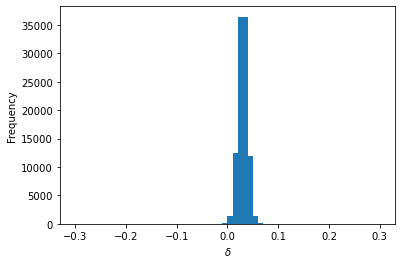

In [142]:
theta_a = np.random.beta(65, 1217, size=100000)
theta_b = np.random.beta(129, 1473, size=100000)
delta = theta_b - theta_a
plt.hist(delta, range=(-0.3, 0.3), bins=60)
plt.xlabel(r'$\delta$')
plt.ylabel('Frequency')
plt.show()

In [143]:
p_value = np.mean(delta > 0)
print(f"prob. difference: {p_value}")

prob. difference: 0.99922
